# Ensemble Machine Learning Algorithms in Python with scikit-learn

> Ensembles can give you a boost in accuracy on your dataset.

> In this notebook you will discover how you can create some of the most powerful types of ensembles in Python using scikit-learn.

# Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

- **Bagging**. Building multiple models (typically of the same type) from different subsamples of the training dataset.
- **Boosting**. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

***

A standard classification problem used to demonstrate each ensemble algorithm is the Pima Indians onset of diabetes dataset. It is a binary classification problem where all of the input variables are numeric and have differing scales.
***

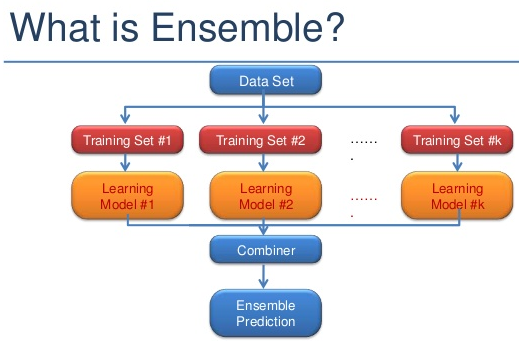

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

## Loading the data

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#Data Cleaning

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

#Glucose
#BloodPressure
#SkinThickness
#Insulin
#BMI

#It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [7]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)

In [12]:
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)

In [13]:
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)

In [14]:
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)

In [15]:
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


If there is a dataset that have great outliers,
I'll prefer median.
E.x.: 99% of household income is below 100, and 1% is above 500.

On the other hand,
if we work with wear of clothes that customers give to dry-cleaner
(assuming that dry-cleaners' operators fill this field intuitively),
I'll fill missings with mean value of wear.

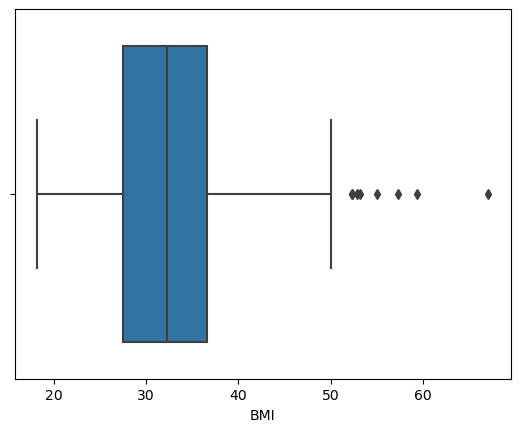

In [17]:
sn.boxplot(x='BMI',data=df_copy)
plt.show()

In [18]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Scaling the data
#Outlier!!! The Silent Killer

In [19]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

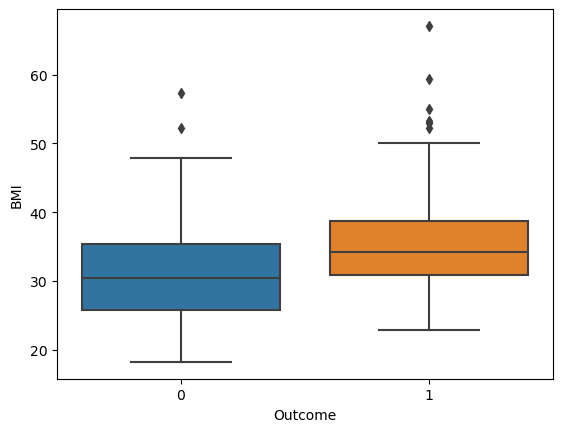

In [20]:
sn.boxplot(x='Outcome', y='BMI',data=df_copy)
plt.show()

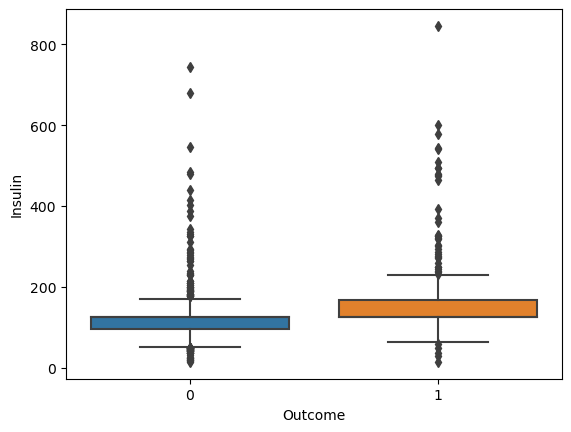

In [21]:
sn.boxplot(x='Outcome', y='Insulin',data=df_copy)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
scaler.fit(df_copy.drop('Outcome',axis=1))

StandardScaler()

In [24]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [25]:
scaled_features

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [26]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-1.629527,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-1.629527,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-3.313196,-1.629527,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [27]:
df_feat['Outcome']= df['Outcome']

In [28]:
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,0.670643,-1.629527,0.166619,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.012301,-1.629527,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,-3.313196,-1.629527,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,1


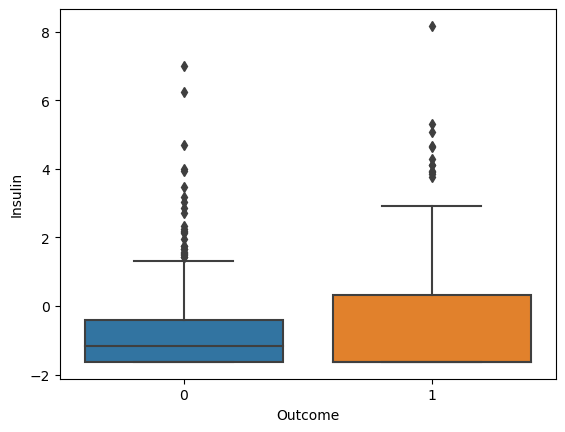

In [29]:
sn.boxplot(x='Outcome',y='Insulin',data=df_feat)
plt.show()

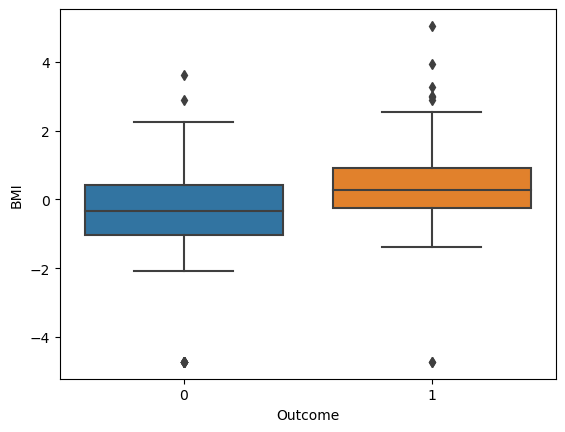

In [30]:
sn.boxplot(x='Outcome', y='BMI',data=df_feat)
plt.show()

# Decide Dependant and Independant Elements in Data Set

In [31]:
x=df_feat.drop('Outcome',axis=1)

In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-1.629527,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-1.629527,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-3.313196,-1.629527,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-1.629527,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-3.313196,-1.629527,-0.342790,-0.371101,1.170732


In [33]:
y=df_feat['Outcome']

In [34]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 670 to 338
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    float64
 1   Glucose                   537 non-null    float64
 2   BloodPressure             537 non-null    float64
 3   SkinThickness             537 non-null    float64
 4   Insulin                   537 non-null    float64
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    float64
dtypes: float64(8)
memory usage: 37.8 KB


In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 714 to 25
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               231 non-null    float64
 1   Glucose                   231 non-null    float64
 2   BloodPressure             231 non-null    float64
 3   SkinThickness             231 non-null    float64
 4   Insulin                   231 non-null    float64
 5   BMI                       231 non-null    float64
 6   DiabetesPedigreeFunction  231 non-null    float64
 7   Age                       231 non-null    float64
dtypes: float64(8)
memory usage: 16.2 KB


# Bagging Algorithms
Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

1. Bagged Decision Trees
2. Random Forest


## 1. Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

**BaggingClassifier**:

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting. If samples are drawn with replacement, then the method is known as Bagging. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.

**BaggingClassifier Parameters:**
- `base_estimator` : The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a decision tree.
***
- `n_estimators` : The number of base estimators in the ensemble.
***
- `max_samples` : The number of samples to draw from X to train each base estimator.
***
- `max_features` : The number of features to draw from X to train each base estimator.
***
- `bootstrap` : Whether samples are drawn with replacement. If False, sampling without replacement is performed.
***
- `bootstrap_features` : Whether features are drawn with replacement.
***
- `oob_score` : Whether to use out-of-bag samples to estimate the generalization error.
***
- `warm_start` : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[350   0]
 [  0 187]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    350.0  187.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[129  21]
 [ 34  47]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.791411   0.691176  0.761905    0.741294      0.756264
recall       0.860000   0.580247  0.761905    0.720123      0.761905
f1-score     0.824281   0.630872  0.761905    0.727577      0.756463
support    150.000000  81.000000  0.761905  231.000000    231.000000


In [41]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [42]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7619047619047619}}

## 2. Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if `bootstrap=True` (default).

- **Random forest algorithm parameters:**
- `n_estimators`: The number of trees in the forest.
***
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.
***
- `warm_start` : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[350   0]
 [  0 187]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    350.0  187.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[131  19]
 [ 31  50]]
ACCURACY SCORE:
0.7835
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.808642   0.724638   0.78355    0.766640      0.779186
recall       0.873333   0.617284   0.78355    0.745309      0.783550
f1-score     0.839744   0.666667   0.78355    0.753205      0.779054
support    150.000000  81.000000   0.78355  231.000000    231.000000


In [44]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [45]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7619047619047619},
 'Random Forest': {'Train': 1.0, 'Test': 0.7835497835497836}}

# Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1. AdaBoost
2. Stochastic Gradient Boosting
***

## 1. AdaBoost
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

**AdaBoostClassifier**:

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

**AdaBoostClassifier Params**:
- `base_estimator` : The base estimator from which the boosted ensemble is built.
***
- `n_estimators` : The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
***
- `learning_rate` : Learning rate shrinks the contribution of each classifier by ``learning_rate``. There is a trade-off between ``learning_rate`` and ``n_estimators``.
***
- `algorithm` : If 'SAMME.R' then use the SAMME.R real boosting algorithm. ``base_estimator`` must support calculation of class probabilities. If 'SAMME' then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[312  38]
 [ 57 130]]
ACCURACY SCORE:
0.8231
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.845528    0.773810  0.823091    0.809669      0.820554
recall       0.891429    0.695187  0.823091    0.793308      0.823091
f1-score     0.867872    0.732394  0.823091    0.800133      0.820695
support    350.000000  187.000000  0.823091  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[129  21]
 [ 29  52]]
ACCURACY SCORE:
0.7835
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816456   0.712329   0.78355    0.764392      0.779944
recall       0.860000   0.641975   0.78355    0.750988      0.783550
f1-score     0.837662   0.675325   0.78355    0.756494      0.780739
support    150.000000  81.000000   0.78355  231.000000    231.000000


In [47]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

## 2. Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

**GradientBoostingClassifier**:

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage ``n_classes_`` regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

**GradientBoostingClassifier Parameters**:

- `loss` : loss function to be optimized. 'deviance' refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss 'exponential' gradient boosting recovers the AdaBoost algorithm.
***
- `learning_rate` : learning rate shrinks the contribution of each tree by `learning_rate`. There is a trade-off between learning_rate and n_estimators.
***
- `n_estimators` : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
***
- `subsample` : The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. `subsample` interacts with the parameter `n_estimators`. Choosing `subsample < 1.0` leads to a reduction of variance and an increase in bias.
***
- `criterion` : The function to measure the quality of a split. Supported criteria are "friedman_mse" for the mean squared error with improvement score by Friedman, "mse" for mean squared error, and "mae" for the mean absolute error. The default value of "friedman_mse" is generally the best as it can provide a better approximation in some cases.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_depth`: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow trees with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `warm_start`: When set to ``True``, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution.
***
- `validation_fraction`: The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if ``n_iter_no_change`` is set to an integer.
***
- `n_iter_no_change`: used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside ``validation_fraction`` size of the training data as validation and terminate training when validation score is not improving in all of the previous ``n_iter_no_change`` numbers of iterations. The split is stratified.
***
- `tol`: Tolerance for the early stopping. When the loss is not improving by at least tol for ``n_iter_no_change`` iterations (if set to a number), the training stops.
***
- `ccp_alpha`: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ``ccp_alpha`` will be chosen.
***

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[341   9]
 [ 25 162]]
ACCURACY SCORE:
0.9367
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.931694    0.947368  0.936685    0.939531      0.937152
recall       0.974286    0.866310  0.936685    0.920298      0.936685
f1-score     0.952514    0.905028  0.936685    0.928771      0.935978
support    350.000000  187.000000  0.936685  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[131  19]
 [ 36  45]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.784431   0.703125  0.761905    0.743778      0.755921
recall       0.873333   0.555556  0.761905    0.714444      0.761905
f1-score     0.826498   0.620690  0.761905    0.723594      0.754332
support    150.000000  81.000000  0.761905  231.000000    231.000000


In [49]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

# Model Comparison

<Axes: >

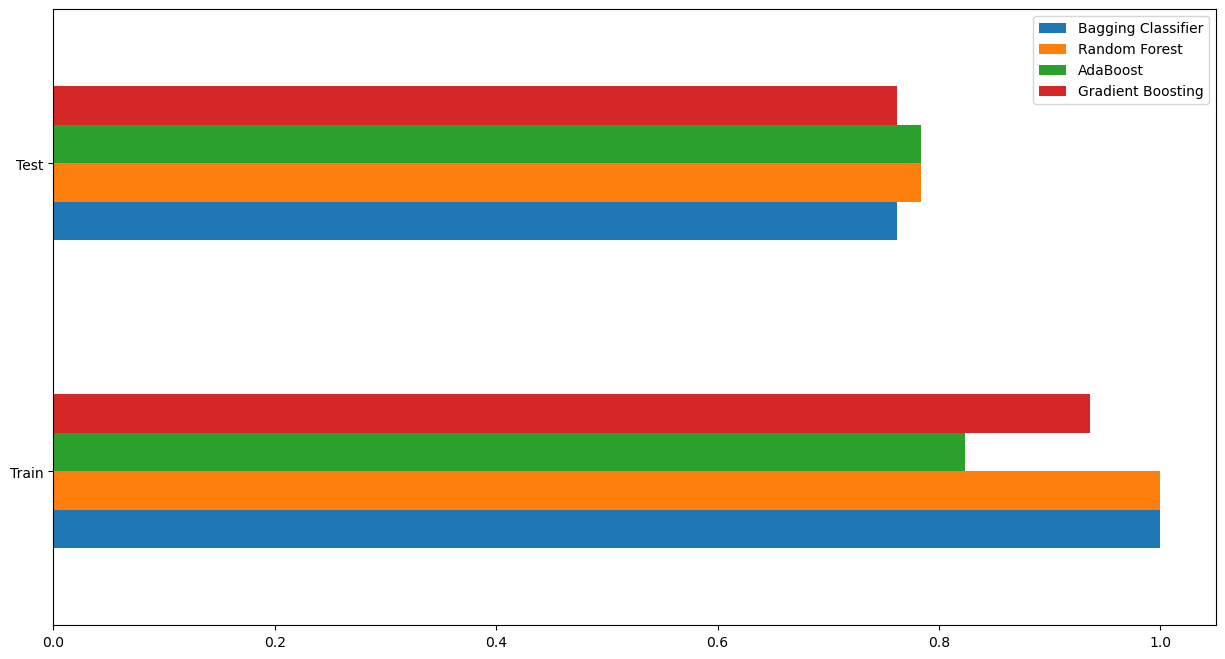

In [50]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))